In [162]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt

In [163]:
#import data
data = np.loadtxt("hw4_q2.csv",delimiter=",", dtype=None)

In [164]:
#set constants
m = 3
n = 64
nm = 1000
lmbda = 1
sigma_2 = 0.1

#create useful matrices
X = np.vstack([np.ones(n), data[:,0], data[:,1], data[:,2]]).T
y = data[:,3]

In [165]:
#fit ordinary LR and ridge regressaion
w = np.linalg.lstsq(X, y, rcond=None)[0]
w_ridge = np.linalg.inv(X.T @ X + lmbda * np.identity(m+1)) @ X.T @ y

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [194]:
alpha = np.linspace(0.01,10,100)
beta = 1 / sigma_2
w_bayes = np.zeros((len(alpha), m+1))
cov_n_bayes = np.zeros((len(alpha), m+1, m+1))

for i in range(100):
    cov_0_bayes = np.identity(m+1) / alpha[i]
    cov_n_bayes[i,:,:] = np.linalg.inv(np.linalg.inv(cov_0_bayes) + beta * X.T @ X) 
    w_bayes[i,:] = cov_n_bayes[i,:,:] @ (np.linalg.inv(cov_0_bayes) @ np.zeros(m+1).T + beta * X.T @ y) 

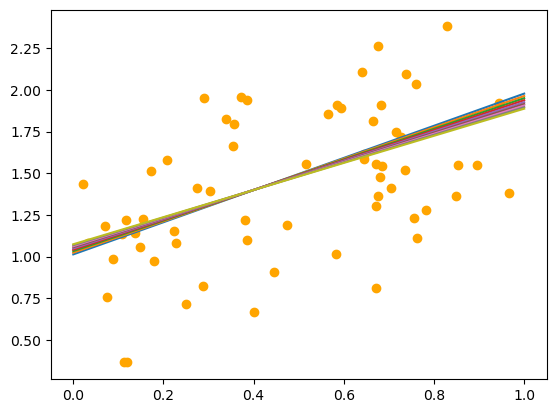

In [195]:
x_values = np.linspace(0,1,1000)
x_2 = 0.5
x_3 = 0.5
x = np.vstack([np.ones(1000), x_values, x_2 * np.ones(1000), x_3 * np.ones(1000)]).T
for i in range(9):
    plt.plot(x_values, x @ w_bayes[10*i])
plt.scatter(data[:,0], data[:,3], color="orange")

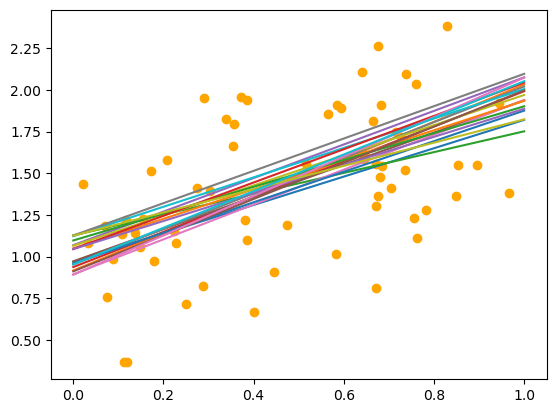

In [196]:
x_values = np.linspace(0,1,1000)
w_values = np.random.multivariate_normal(w_bayes[9,:], cov_n_bayes[9,:,:], 20).T
x_2 = 0.5
x_3 = 0.5
x = np.vstack([np.ones(1000), x_values, x_2 * np.ones(1000), x_3 * np.ones(1000)]).T
for i in range(20):
    plt.plot(x_values, x @ w_values[:,i])
plt.scatter(data[:,0], data[:,3], color="orange")

when alpha approaches 0, cov_0_bayes = large number * identity --> inv(cov_0_bayes) = extremely small number * identity, so this approaches traditional linear regression weights. makes sense, since prior becomes less meaningful & more sparse, giving less "information" to the bayesian modele

as alpha becomes larger, it seems to approach ridge regression